Name : Bhanupriya R  


Email : bhanupriya252005@gmail.com


Project Title : Energy consumption estimation from machine load, shift duration, and ambient conditions.


Aim : To analyze and predict energy consumption based on machine, operational, and environmental factors using machine learning techniques.


In [1]:
datalink='/content/energy_consumption.csv'

Analysing the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('energy_consumption.csv')
df.head()

,machine_load_percent,shift_duration_hours,ambient_temp_c,machine_age_years,equipment_type,power_supply,maintenance_interval,operating_mode,voltage_stability,season,energy_consumed_kwh
0,58.722442,NaN,23.683254,2.309649,Pump,Generator,Monthly,Continuous,Stable,Spring,1100.227423
1,78.221874,9.488840,21.236102,13.643749,Pump,Solar,Annual,Intermittent,Stable,Summer,597.013874
2,89.721257,9.166522,19.023934,0.131779,NaN,Generator,Monthly,Continuous,Stable,Spring,197.697537
3,47.981773,8.316916,25.075593,6.519075,Furnace,Grid,Monthly,Intermittent,Stable,Winter,NaN
4,95.119687,11.083868,32.049599,0.322186,Furnace,Generator,Monthly,NaN,Unstable,Winter,125.378358


In [4]:
print(df.columns)

Index(['machine_load_percent', 'shift_duration_hours', 'ambient_temp_c',
       'machine_age_years', 'equipment_type', 'power_supply',
       'maintenance_interval', 'operating_mode', 'voltage_stability', 'season',
       'energy_consumed_kwh'],
      dtype='object')


In [5]:
print(df.dtypes)

machine_load_percent    float64
shift_duration_hours    float64
ambient_temp_c          float64
machine_age_years       float64
equipment_type           object
power_supply             object
maintenance_interval     object
operating_mode           object
voltage_stability        object
season                   object
energy_consumed_kwh     float64
dtype: object


In [6]:
print(df.head())

   machine_load_percent  shift_duration_hours  ambient_temp_c  \
0             58.722442                   NaN       23.683254   
1             78.221874              9.488840       21.236102   
2             89.721257              9.166522       19.023934   
3             47.981773              8.316916       25.075593   
4             95.119687             11.083868       32.049599   

   machine_age_years equipment_type power_supply maintenance_interval  \
0           2.309649           Pump    Generator              Monthly   
1          13.643749           Pump        Solar               Annual   
2           0.131779            NaN    Generator              Monthly   
3           6.519075        Furnace         Grid              Monthly   
4           0.322186        Furnace    Generator              Monthly   

  operating_mode voltage_stability  season  energy_consumed_kwh  
0     Continuous            Stable  Spring          1100.227423  
1   Intermittent            Stable  Su

In [7]:

missing_summary = pd.DataFrame({
    "Missing_Count": df.isnull().sum(),
    "Missing_Percentage (%)": (df.isnull().mean() * 100).round(2)
})

In [8]:
print(missing_summary)

                      Missing_Count  Missing_Percentage (%)
machine_load_percent             41                     4.1
shift_duration_hours             50                     5.0
ambient_temp_c                   62                     6.2
machine_age_years                60                     6.0
equipment_type                   63                     6.3
power_supply                     51                     5.1
maintenance_interval             42                     4.2
operating_mode                   53                     5.3
voltage_stability                47                     4.7
season                           57                     5.7
energy_consumed_kwh              41                     4.1


In [9]:
print(df.describe())

       machine_load_percent  shift_duration_hours  ambient_temp_c  \
count            959.000000            950.000000      938.000000   
mean              70.301428             10.043225       25.032124   
std               17.193047              1.168985        5.749756   
min               40.087281              8.004109       15.024678   
25%               55.755954              9.033420       19.959696   
50%               70.356633             10.084286       25.032573   
75%               84.970082             11.078554       30.170669   
max               99.807442             11.998871       34.991222   

       machine_age_years  energy_consumed_kwh  
count         940.000000           959.000000  
mean            7.440102          1044.371885  
std             4.345138           575.626457  
min             0.000703            50.526739  
25%             3.731821           546.456121  
50%             7.405911          1065.604357  
75%            11.032004          1560.217

In [10]:
print(df.describe(include="object"))

       equipment_type power_supply maintenance_interval operating_mode  \
count             937          949                  958            947   
unique              4            3                    4              3   
top           Furnace        Solar              Monthly          Batch   
freq              254          325                  266            322   

       voltage_stability  season  
count                953     943  
unique                 3       4  
top             Moderate  Spring  
freq                 328     249  


In [11]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
correlation_matrix = numeric_df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                      machine_load_percent  shift_duration_hours  \
machine_load_percent              1.000000             -0.078164   
shift_duration_hours             -0.078164              1.000000   
ambient_temp_c                   -0.024149              0.018758   
machine_age_years                 0.019593              0.050198   
energy_consumed_kwh               0.008151             -0.009918   

                      ambient_temp_c  machine_age_years  energy_consumed_kwh  
machine_load_percent       -0.024149           0.019593             0.008151  
shift_duration_hours        0.018758           0.050198            -0.009918  
ambient_temp_c              1.000000           0.027722            -0.050037  
machine_age_years           0.027722           1.000000            -0.024822  
energy_consumed_kwh        -0.050037          -0.024822             1.000000  


In [12]:
print("\nAverage Energy Consumption by Equipment Type:")
print(df.groupby("equipment_type")["energy_consumed_kwh"].mean())



Average Energy Consumption by Equipment Type:
equipment_type
Compressor    1015.273413
Furnace       1029.735304
Motor         1058.776261
Pump          1065.817555
Name: energy_consumed_kwh, dtype: float64


In [13]:
print("\nAverage Energy Consumption by Power Supply:")
print(df.groupby("power_supply")["energy_consumed_kwh"].mean())



Average Energy Consumption by Power Supply:
power_supply
Generator    1033.371025
Grid         1077.901750
Solar        1014.787689
Name: energy_consumed_kwh, dtype: float64


In [14]:
print("\nAverage Energy Consumption by Season:")
print(df.groupby("season")["energy_consumed_kwh"].mean())



Average Energy Consumption by Season:
season
Autumn    1098.878242
Spring    1066.655017
Summer     998.101529
Winter    1030.435397
Name: energy_consumed_kwh, dtype: float64


In [15]:

print("\nAverage Energy Consumption by Operating Mode:")
print(df.groupby("operating_mode")["energy_consumed_kwh"].mean())


Average Energy Consumption by Operating Mode:
operating_mode
Batch           1027.455978
Continuous      1050.939778
Intermittent    1053.929263
Name: energy_consumed_kwh, dtype: float64


do missing value analysis and data imputation

In [16]:
import pandas as pd

In [17]:
df = pd.read_csv(datalink)


In [18]:
df.isnull()

,machine_load_percent,shift_duration_hours,ambient_temp_c,machine_age_years,equipment_type,power_supply,maintenance_interval,operating_mode,voltage_stability,season,energy_consumed_kwh
0,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,True,False,False


In [19]:
df.isnull().sum()

,0
machine_load_percent,41
shift_duration_hours,50
ambient_temp_c,62
machine_age_years,60
equipment_type,63
power_supply,51
maintenance_interval,42
operating_mode,53
voltage_stability,47
season,57


In [20]:
df_cleaned=df.copy()

In [21]:
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
for col in numeric_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

In [22]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

In [23]:
df_cleaned.isnull().sum()

,0
machine_load_percent,0
shift_duration_hours,0
ambient_temp_c,0
machine_age_years,0
equipment_type,0
power_supply,0
maintenance_interval,0
operating_mode,0
voltage_stability,0
season,0


In [24]:
df_cleaned.to_csv("energy_consumption_cleaned.csv", index=False)

print("\nCleaned dataset saved as energy_consumption_cleaned.csv")



Cleaned dataset saved as energy_consumption_cleaned.csv


In [25]:
df_cleaned = pd.read_csv("energy_consumption_cleaned.csv")

In [26]:

df_cleaned.head(10)

,machine_load_percent,shift_duration_hours,ambient_temp_c,machine_age_years,equipment_type,power_supply,maintenance_interval,operating_mode,voltage_stability,season,energy_consumed_kwh
0,58.722442,10.043225,23.683254,2.309649,Pump,Generator,Monthly,Continuous,Stable,Spring,1100.227423
1,78.221874,9.488840,21.236102,13.643749,Pump,Solar,Annual,Intermittent,Stable,Summer,597.013874
2,89.721257,9.166522,19.023934,0.131779,Furnace,Generator,Monthly,Continuous,Stable,Spring,197.697537
3,47.981773,8.316916,25.075593,6.519075,Furnace,Grid,Monthly,Intermittent,Stable,Winter,1044.371885
4,95.119687,11.083868,32.049599,0.322186,Furnace,Generator,Monthly,Batch,Unstable,Winter,125.378358
5,42.056274,9.681819,33.938304,7.850368,Compressor,Solar,Monthly,Batch,Unstable,Autumn,165.316114
6,45.706380,11.255893,34.441097,6.182342,Motor,Solar,Monthly,Batch,Unstable,Autumn,625.123709
7,90.287688,11.342909,25.627567,9.345929,Compressor,Grid,Weekly,Continuous,Stable,Autumn,1167.220671
8,69.562230,8.854390,27.105207,11.496662,Furnace,Generator,Weekly,Intermittent,Unstable,Spring,1984.841707
9,96.355291,9.685320,26.630795,11.528628,Furnace,Grid,Monthly,Batch,Unstable,Autumn,226.751072


EDA and data visualization

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
df = pd.read_csv(datalink)

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   machine_load_percent  959 non-null    float64
 1   shift_duration_hours  950 non-null    float64
 2   ambient_temp_c        938 non-null    float64
 3   machine_age_years     940 non-null    float64
 4   equipment_type        937 non-null    object 
 5   power_supply          949 non-null    object 
 6   maintenance_interval  958 non-null    object 
 7   operating_mode        947 non-null    object 
 8   voltage_stability     953 non-null    object 
 9   season                943 non-null    object 
 10  energy_consumed_kwh   959 non-null    float64
dtypes: float64(5), object(6)
memory usage: 86.1+ KB
None


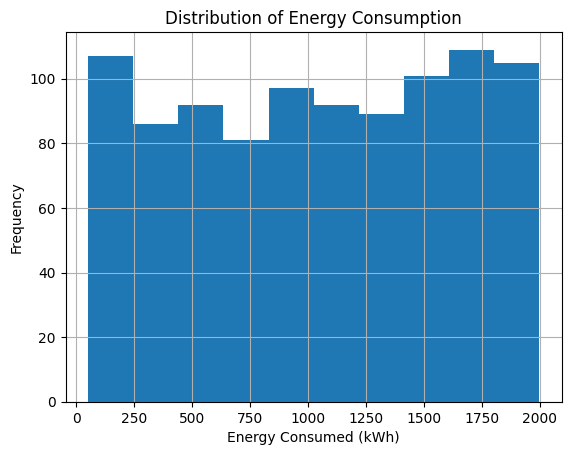

In [30]:
plt.figure()
df["energy_consumed_kwh"].hist()
plt.title("Distribution of Energy Consumption")
plt.xlabel("Energy Consumed (kWh)")
plt.ylabel("Frequency")
plt.show()


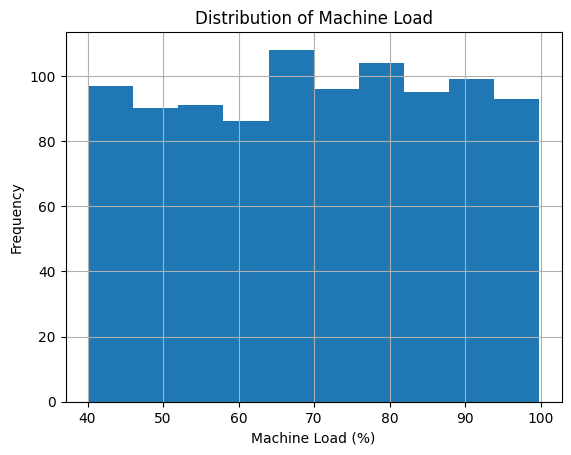

In [31]:
plt.figure()
df["machine_load_percent"].hist()
plt.title("Distribution of Machine Load")
plt.xlabel("Machine Load (%)")
plt.ylabel("Frequency")
plt.show()


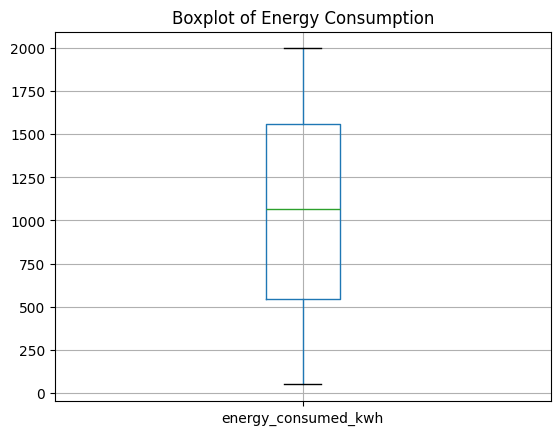

In [32]:
plt.figure()
df.boxplot(column="energy_consumed_kwh")
plt.title("Boxplot of Energy Consumption")
plt.show()


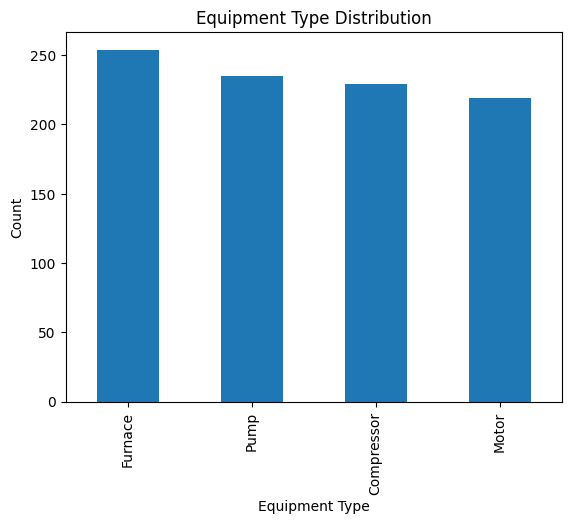

In [33]:
plt.figure()
df["equipment_type"].value_counts().plot(kind="bar")
plt.title("Equipment Type Distribution")
plt.xlabel("Equipment Type")
plt.ylabel("Count")
plt.show()

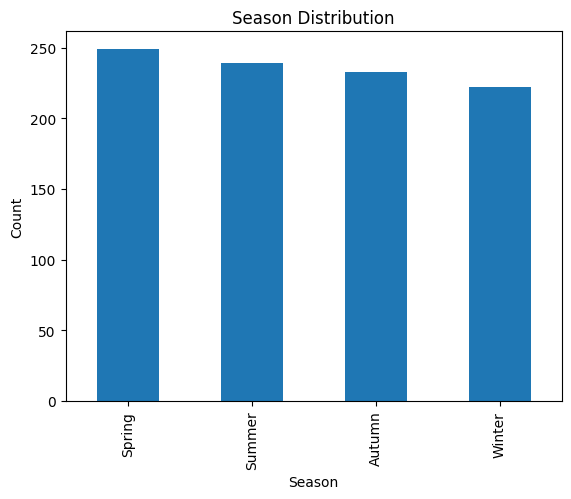

In [34]:
plt.figure()
df["season"].value_counts().plot(kind="bar")
plt.title("Season Distribution")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

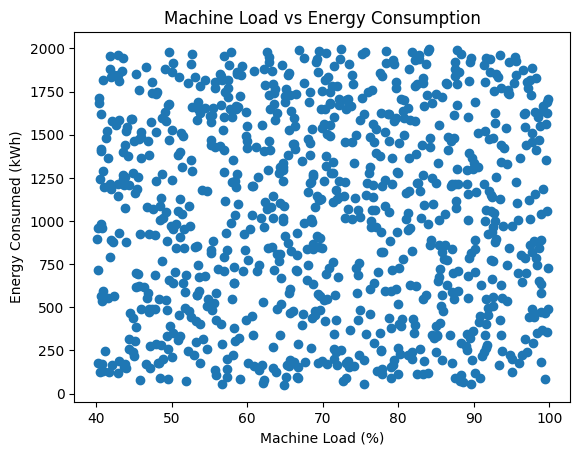

In [35]:
plt.figure()
plt.scatter(df["machine_load_percent"], df["energy_consumed_kwh"])
plt.title("Machine Load vs Energy Consumption")
plt.xlabel("Machine Load (%)")
plt.ylabel("Energy Consumed (kWh)")
plt.show()


<Figure size 640x480 with 0 Axes>

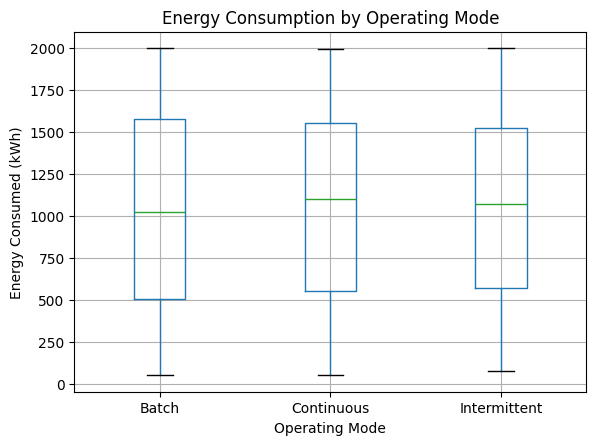

In [36]:
plt.figure()
df.boxplot(column="energy_consumed_kwh", by="operating_mode")
plt.title("Energy Consumption by Operating Mode")
plt.suptitle("")
plt.xlabel("Operating Mode")
plt.ylabel("Energy Consumed (kWh)")
plt.show()


In [37]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
correlation_matrix = numeric_df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                      machine_load_percent  shift_duration_hours  \
machine_load_percent              1.000000             -0.078164   
shift_duration_hours             -0.078164              1.000000   
ambient_temp_c                   -0.024149              0.018758   
machine_age_years                 0.019593              0.050198   
energy_consumed_kwh               0.008151             -0.009918   

                      ambient_temp_c  machine_age_years  energy_consumed_kwh  
machine_load_percent       -0.024149           0.019593             0.008151  
shift_duration_hours        0.018758           0.050198            -0.009918  
ambient_temp_c              1.000000           0.027722            -0.050037  
machine_age_years           0.027722           1.000000            -0.024822  
energy_consumed_kwh        -0.050037          -0.024822             1.000000  


In [38]:
energy_by_equipment = df.groupby("equipment_type")["energy_consumed_kwh"].mean()
print("\nAverage Energy Consumption by Equipment Type:")
print(energy_by_equipment)


Average Energy Consumption by Equipment Type:
equipment_type
Compressor    1015.273413
Furnace       1029.735304
Motor         1058.776261
Pump          1065.817555
Name: energy_consumed_kwh, dtype: float64


In [39]:
energy_by_season = df.groupby("season")["energy_consumed_kwh"].mean()
print("\nAverage Energy Consumption by Season:")
print(energy_by_season)


Average Energy Consumption by Season:
season
Autumn    1098.878242
Spring    1066.655017
Summer     998.101529
Winter    1030.435397
Name: energy_consumed_kwh, dtype: float64


Different types of regression

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [42]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [43]:
X = df.drop("energy_consumed_kwh", axis=1)
y = df["energy_consumed_kwh"]

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ],
    remainder="passthrough"
)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(
        n_estimators=100, random_state=42
    )
}

In [47]:
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print("MSE:", mse)
    print("R² Score:", r2)



Linear Regression
MSE: 326082.41091293
R² Score: -0.044662237180419506

Ridge Regression
MSE: 326028.74354915676
R² Score: -0.04449030436090351

Lasso Regression
MSE: 325938.4450359784
R² Score: -0.044201017224786865

Decision Tree Regression
MSE: 660986.5352168056
R² Score: -1.1175863815914338

Random Forest Regression
MSE: 336871.1461999204
R² Score: -0.07922584430568769


different types of conventional classification

In [48]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# 1. Load Dataset

data = pd.read_csv("energy_consumption.csv")

print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:\n", data.head())

# 2. Handle Missing Values

print("\nMissing Values:\n", data.isnull().sum())

# Fill numeric columns with mean
for col in data.select_dtypes(include=np.number).columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Fill categorical columns with mode
for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)


# 3. Create a categorical target variable for classification

# Bin 'energy_consumed_kwh' into categories
min_val = data['energy_consumed_kwh'].min()
max_val = data['energy_consumed_kwh'].max()
bins = [min_val, data['energy_consumed_kwh'].quantile(0.33), data['energy_consumed_kwh'].quantile(0.66), max_val]
labels = ['Low', 'Medium', 'High']
data['energy_level'] = pd.cut(data['energy_consumed_kwh'], bins=bins, labels=labels, include_lowest=True)


# 4. Encode Categorical Variables (including the new target)

label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 5. Define Target Variable

TARGET_COLUMN = 'energy_level'
X = data.drop(TARGET_COLUMN, axis=1)
y = data[TARGET_COLUMN]


# 6. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # stratify=y is good practice for classification
)


# 7. Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 8. Define Conventional Classifiers

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'), # Specify solver
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


# 9. Train and Evaluate Models

results = {}
for name, model in models.items():

    if name in ["Logistic Regression", "KNN", "SVM", "Naive Bayes"]:
        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_test_scaled)
    else: # For Decision Tree and Random Forest, we can use non-scaled data or scaled
        model.fit(X_train_scaled, y_train) # Using scaled data for consistency
        predictions = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

    print("\n" + "="*50)
    print(f"{name}")
    print("="*50)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n", classification_report(y_test, predictions))


# 10. Final Comparison

print("\n\n===== MODEL COMPARISON =====")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")

Dataset Shape: (1000, 11)

First 5 rows:
    machine_load_percent  shift_duration_hours  ambient_temp_c  \
0             58.722442                   NaN       23.683254   
1             78.221874              9.488840       21.236102   
2             89.721257              9.166522       19.023934   
3             47.981773              8.316916       25.075593   
4             95.119687             11.083868       32.049599   

   machine_age_years equipment_type power_supply maintenance_interval  \
0           2.309649           Pump    Generator              Monthly   
1          13.643749           Pump        Solar               Annual   
2           0.131779            NaN    Generator              Monthly   
3           6.519075        Furnace         Grid              Monthly   
4           0.322186        Furnace    Generator              Monthly   

  operating_mode voltage_stability  season  energy_consumed_kwh  
0     Continuous            Stable  Spring          1100.22742

/tmp/ipython-input-2567379939.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
/tmp/ipython-input-2567379939.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 


Random Forest
Accuracy: 0.995
Confusion Matrix:
 [[67  0  1]
 [ 0 66  0]
 [ 0  0 66]]
Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.99      0.99        68
         Low       1.00      1.00      1.00        66
      Medium       0.99      1.00      0.99        66

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



===== MODEL COMPARISON =====
Logistic Regression: 0.9600
Naive Bayes: 0.9900
KNN: 0.7900
Decision Tree: 0.9950
SVM: 0.9450
Random Forest: 0.9950


Classification using neural network

In [49]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical # Will be used if y is one-hot encoded


# 1. Load Dataset

data = pd.read_csv("energy_consumption.csv")


# 2. Handle Missing Values and Create Target Column

for col in data.select_dtypes(include=np.number).columns:
    data[col].fillna(data[col].mean(), inplace=True)

for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Create the 'energy_level' target variable by binning 'energy_consumed_kwh'
min_val = data['energy_consumed_kwh'].min()
max_val = data['energy_consumed_kwh'].max()
bins = [min_val, data['energy_consumed_kwh'].quantile(0.33), data['energy_consumed_kwh'].quantile(0.66), max_val]
labels = ['Low', 'Medium', 'High']
data['energy_level'] = pd.cut(data['energy_consumed_kwh'], bins=bins, labels=labels, include_lowest=True)
# Define the actual TARGET_COLUMN
TARGET_COLUMN = "energy_level"

# 3. Encode Categorical Variables (excluding the new target, which will be handled separately)

label_encoders = {}
# Encode all object-type categorical features (excluding 'energy_level' for now if it's already created as a category)
for col in data.select_dtypes(include='object').columns:
    if col != TARGET_COLUMN: # Make sure not to re-encode the target if it's already numerical
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Define X and y after all feature encoding but before target encoding
X = data.drop(TARGET_COLUMN, axis=1)
y = data[TARGET_COLUMN]

# Explicitly encode the target variable `y` to integers for Keras
le = LabelEncoder()
y = le.fit_transform(y)

# Determine the number of classes for the output layer
num_classes = len(np.unique(y))


# 4. Train–Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y # stratify=y for balanced classes
)


# 5. Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 6. Build Neural Network for Multi-class Classification

model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation="relu"))
# Change output layer for multi-class classification
model.add(Dense(num_classes, activation="softmax"))


# 7. Compile Model

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


# 8. Train Model

model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# 9. Evaluate Model

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/50


/tmp/ipython-input-3888474812.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
/tmp/ipython-input-3888474812.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3238 - loss: 1.1284 - val_accuracy: 0.4500 - val_loss: 1.0020
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5896 - loss: 0.9432 - val_accuracy: 0.6250 - val_loss: 0.8596
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7286 - loss: 0.7928 - val_accuracy: 0.7500 - val_loss: 0.7056
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8002 - loss: 0.6400 - val_accuracy: 0.8375 - val_loss: 0.5686
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8521 - loss: 0.5119 - val_accuracy: 0.9000 - val_loss: 0.4654
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9274 - loss: 0.4082 - val_accuracy: 0.9125 - val_loss: 0.3800
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9192 - loss: 0.3345 - val_accuracy: 0.9250 - val_loss: 0.3215
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9407 - loss: 0.2720 - val_accuracy: 0.9375 - val_loss: 0.2723

In [50]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.9 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.1
    Uninstalling cachetools-7.0.1:
      Successfully uninstalled cachetools-7.0.1


In [51]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

--2026-02-18 05:05:23--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2026.2.0/cloudflared-linux-amd64.deb [following]
--2026-02-18 05:05:23--  https://github.com/cloudflare/cloudflared/releases/download/2026.2.0/cloudflared-linux-amd64.deb
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/4fddf4d7-e02d-44dc-9e5a-ef9e28afdd54?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-02-18T06%3A00%3A38Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64.deb&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&

In [52]:
%%writefile app.py
import streamlit as st
import math

st.set_page_config(page_title="Energy Consumption Estimator", layout="centered")

st.title("⚡ Energy Consumption Estimation System")
st.subheader("Machine Load + Shift + Environment Based Prediction")

st.divider()

# -------- INPUTS --------
machine_type = st.selectbox(
    "Select Machine Type",
    ["CNC", "Lathe", "Compressor", "Conveyor"]
)

load = st.slider("Machine Load (%)", 0, 100, 60)
shift_hours = st.slider("Shift Duration (hours)", 1, 24, 8)

temp = st.slider("Ambient Temperature (°C)", 10, 50, 30)
humidity = st.slider("Humidity (%)", 10, 100, 50)

# -------- MACHINE FACTORS --------
machine_factor = {
    "CNC": 1.4,
    "Lathe": 1.1,
    "Compressor": 1.6,
    "Conveyor": 0.9
}

# -------- ESTIMATION LOGIC --------
def estimate_energy(load, hours, temp, humidity, mtype):
    base = load * hours * machine_factor[mtype] * 0.12
    temp_factor = 1 + (temp - 25) * 0.01
    humidity_factor = 1 + (humidity - 50) * 0.003
    return round(base * temp_factor * humidity_factor, 2)

# -------- OUTPUT --------
if st.button("Estimate Energy Consumption"):
    energy = estimate_energy(load, shift_hours, temp, humidity, machine_type)

    st.success("Estimation Completed ✅")

    st.metric("Estimated Energy Usage (kWh)", energy)

    # usage status
    if energy < 50:
        st.info("Low Consumption Zone 🟢")
    elif energy < 120:
        st.warning("Moderate Consumption Zone 🟡")
    else:
        st.error("High Consumption Zone 🔴")

    # simple chart
    st.line_chart([energy*0.6, energy*0.8, energy])

st.divider()
st.caption("Frontend built using Streamlit | Demo Energy Model")


Writing app.py


In [53]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!cloudflared tunnel --url http://localhost:8501

2026-02-18T05:05:27Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2026-02-18T05:05:27Z INF Requesting new quick Tunnel on trycloudflare.com...
2026-02-18T05:05:33Z INF +--------------------------------------------------------------------------------------------+
2026-02-18T05:05:33Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2026-02-18T05:05:33Z INF |  https://compiled-about-quantity-ink.trycloudflare.com